# Dijkstra's Algorithm

Dijkstra's Algorithm is a useful graph traversal algorithm developed by famed computer scientist Edsgar W. Dijkstra. In short, Dijkstra's algorithm is an algorithm that is used to find the shortest paths from the source vertex to different vertices in the graph.

## Using an adjacency list

In [ ]:
def dijkstra_list(G, source):
    pass

## Using an adjacency matrix

Here is the pseudocode for Dijkstra's Algorithm.

```
function Dijkstra(Adjacency Matrix, source):
    distance at source vertex = 0
    
    for range of amount of vertices:
        for range of amount of vertices:
            if vertex was not visited and distance is less than infinity:
                save distance of specific vertex as minimum
                save the vertex           
        vertex saved is marked as visited
            
        for range of amount of vertices:
            if distance from saved vertex to current vertex is greater than zero and 
            vertex was not visited and 
            distance of current vertex > distance of minimum vertex + distance from saved vertex to current vertex:
                distance of current vertex = distance of minimum vertex + distance from saved vertex to current vertex

```

## Code for Dijkstra's Algorithm

The purpose of Dijkstra's Algorithm is to find the shortest path to each vertex in a graph from a start vertex. To determine what would classify as the shortest path from a source vertex to any other vertex, each edge is given a weight value. Using this, Dijkstra's Algorithm finds all the different paths from source vertex to a certain vertex on the graph and compares the added up weight values from the edges along the path. The path with the smallest value from the added weights is considered the shortest path. This is done to every other vertex as well, giving a shortest path from a source vertex to every other vertex in a graph.

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks
import numpy as np

In our implementation of Dijkstra, we pass in an adjacency matrix as parameter. An adjacency matrix is used to store the weights of an edge between two vertices. Each element within the matrix tells us whether 2 vertices are adjacent and the value given as the element is the weight. If 2 vertices are NOT adjacent then the value stored as the element is 0. We also pass in the source vertex.

In [15]:
def dijkstra(A, source): 
        distance = [np.inf] * len(A) 
        distance[source] = 0
        short_path = [False] * len(A)
   
        for i in range(len(A)): 
        
            min = np.inf 
   
            for j in range(len(A)): 
                if distance[j] < min and short_path[j] == False: 
                    min = distance[j] 
                    min_index = j
            j = min_index
            short_path[j] = True
   
            for k in range(len(A)): 
                if (A[j][k] > 0) and (short_path[k] == False) and (distance[k] > distance[j] + A[j][k]): 
                    distance[k] = distance[j] + A[j][k]
                    
        print ("Graph Vertex \t Distance from Source") 
        print("-------------------------------------")
        for node in range(len(A)): 
            print (node, "\t\t", distance[node]) 
   

## Undirected Graph

Dijkstra's algorithm in the most simplest form can be used to find the shortest path within an undirected graph. In this undirected graph, weights have not been specified. Since that is the case, if two vertices have an edge between them then the weight value will automatically be initalized to 1.0.  

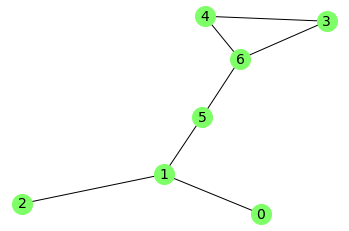

In [16]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(4, 6)
G.add_edge(5, 6)
draw_graph(G)



Below is the adjacency matrix for the graph. As one can see, this matrix is symmetrical along the diagonal. This is because the graph is undirected and if vertex A has a path to vertex B then therefore vertex B has a path to vertex A as well.

In [30]:
A = nx.to_numpy_array(G)
print(A)

7


### Results

Here, we pass in the graph we created along with the adjacency matrix of it. We also pass in our source vertex which in this case will be the 0 vertex.

In [18]:
dijkstra(A, 0)

Graph Vertex 	 Distance from Source
-------------------------------------
0 		 0
1 		 1.0
2 		 2.0
3 		 4.0
4 		 4.0
5 		 2.0
6 		 3.0


## Directed Graph

Here is Dijkstra's Algorithm implemented on a directed graph with uninitialized weights. Since direction is important here, if the source vertex cannot reach a certain vertex within the graph, *inf* (i.e. infinity) will be printed as the shortest path.

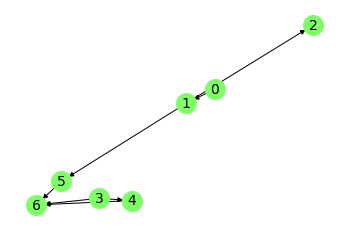

In [19]:
G = nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(4, 6)
G.add_edge(5, 6)
draw_graph(G)

Here is the adjacency matrix. This is NOT symmetrical because the graph is directed.

In [20]:
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


### Results

In [21]:
dijkstra(A, 0)

Graph Vertex 	 Distance from Source
-------------------------------------
0 		 0
1 		 1.0
2 		 2.0
3 		 inf
4 		 inf
5 		 2.0
6 		 3.0


## Undirected Graph with Initialized Weights

In this undirected graph, weights have been initialized for each path. 

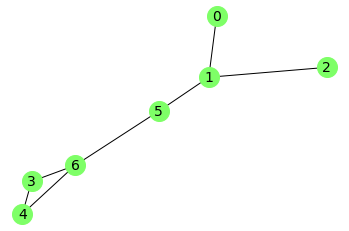

In [22]:
G = nx.Graph()
G.add_edge(0, 1,weight=2.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=6.0)
G.add_edge(3, 6,weight=7.0)
G.add_edge(4, 6,weight=2.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)

These are the weights of the edges between two vertices.

In [23]:
for i in list(G.edges(data=True)):
    print(i)

(0, 1, {'weight': 2.0})
(1, 2, {'weight': 1.0})
(1, 5, {'weight': 6.0})
(3, 4, {'weight': 4.0})
(3, 6, {'weight': 7.0})
(4, 6, {'weight': 2.0})
(5, 6, {'weight': 2.0})


Here is our matrix. As stated above, this is a symmetrical matrix along the diagonal because the graph is undirected.

In [24]:
A = nx.to_numpy_array(G)
print(A)

[[0. 2. 0. 0. 0. 0. 0.]
 [2. 0. 1. 0. 0. 6. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 7.]
 [0. 0. 0. 4. 0. 0. 2.]
 [0. 6. 0. 0. 0. 0. 2.]
 [0. 0. 0. 7. 2. 2. 0.]]


### Results

In [25]:
dijkstra(A, 0)

Graph Vertex 	 Distance from Source
-------------------------------------
0 		 0
1 		 2.0
2 		 3.0
3 		 16.0
4 		 12.0
5 		 8.0
6 		 10.0


## Directed Graph with Initialized Weights

In this directed graph, weights have been initialized for each path. 

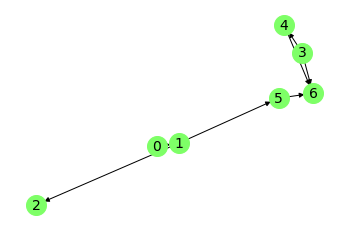

In [26]:
G = nx.DiGraph()
G.add_edge(0, 1,weight=3.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=2.0)
G.add_edge(3, 6,weight=8.0)
G.add_edge(4, 6,weight=3.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)


Here are the weights for the edges in the directed graph. 

In [27]:
for i in list(G.edges(data=True)):
    print(i)

(0, 1, {'weight': 3.0})
(1, 2, {'weight': 1.0})
(1, 5, {'weight': 2.0})
(3, 4, {'weight': 4.0})
(3, 6, {'weight': 8.0})
(4, 6, {'weight': 3.0})
(5, 6, {'weight': 2.0})


In [28]:
A = nx.to_numpy_array(G)
print(A)

[[0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 8.]
 [0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0.]]


### Results

In [ ]:
dijkstra(A, 0)